## Analysis of COVID-19 Data in Japan

Parker Perkins
perkinlp@dukes.jmu.edu
IA 241

### Introduction

"Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus.

Most people infected with the virus will experience mild to moderate respiratory illness and recover without requiring special treatment. However, some will become seriously ill and require medical attention. Older people and those with underlying medical conditions like cardiovascular disease, diabetes, chronic respiratory disease, or cancer are more likely to develop serious illness. Anyone can get sick with COVID-19 and become seriously ill or die at any age."
[World Health Organization](https://www.who.int/health-topics/coronavirus?msclkid=9df4318ccec711ec837afaf696c4400a#tab=tab_1)

COVID-19 was declared a worldwide pandemic in 2020, effecting every nation, including Japan.

### Data Source

[European Center for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

In [1]:
%matplotlib inline
import pandas
import matplotlib.pyplot as plt

### Importing Data

In [2]:
df = pandas.read_excel('s3://ia241-perkinlp/covid_data.xls')

In [3]:
df = pandas.read_excel('s3://ia241-perkinlp/covid_data.xls')
jp_data = df.loc[df['countriesAndTerritories'] == 'Japan']
jp_data[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
29726,14/12/2020,14,12,2020,2366,23,Japan,JP,JPN,126860299.0,Asia,25.928522
29727,13/12/2020,13,12,2020,2988,28,Japan,JP,JPN,126860299.0,Asia,25.724360
29728,2020-12-12 00:00:00,12,12,2020,2757,32,Japan,JP,JPN,126860299.0,Asia,25.406688
29729,2020-11-12 00:00:00,11,12,2020,2969,37,Japan,JP,JPN,126860299.0,Asia,25.264799
29730,2020-10-12 00:00:00,10,12,2020,2733,45,Japan,JP,JPN,126860299.0,Asia,24.682269
29731,2020-09-12 00:00:00,9,12,2020,1911,38,Japan,JP,JPN,126860299.0,Asia,23.994899
29732,2020-08-12 00:00:00,8,12,2020,1862,47,Japan,JP,JPN,126860299.0,Asia,23.648060
29733,2020-07-12 00:00:00,7,12,2020,1969,20,Japan,JP,JPN,126860299.0,Asia,24.554569
29734,2020-06-12 00:00:00,6,12,2020,2424,32,Japan,JP,JPN,126860299.0,Asia,23.584211
29735,2020-05-12 00:00:00,5,12,2020,2442,43,Japan,JP,JPN,126860299.0,Asia,23.655155


## What was Japan's deadliest month in 2020?

<AxesSubplot:xlabel='month'>

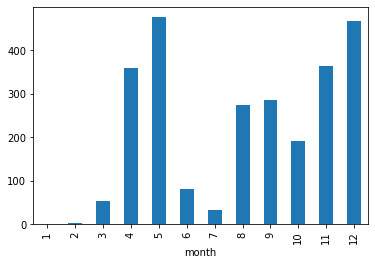

In [4]:
deadliest_month = jp_data.groupby('month').sum()['deaths']
deadliest_month.plot.bar()

This bar plot shows that May 2020 was the deadliest month for Japan, followed closely by December. For calculations, the deaths were summed and then grouped by month to allow for visualization of the deaths per each month.

## How did the pandemic progress in Japan in 2020?

<AxesSubplot:xlabel='month'>

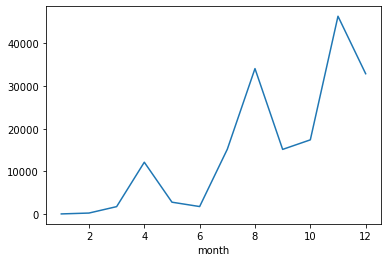

In [5]:
sum_cases_per_day = jp_data.groupby('month').sum()['cases']
sum_cases_per_day.plot()

The number of cases in Japan steadily grew over 2020 with noticable spikes in cases in April, August, and November. For calculations, the cases were summed and then grouped by month to allow for visualization of the deaths per each month. A line graph was used to allow for easier visualization of trends.

## How did Japan's case to population ratio compare to the US' in 2020?

In [6]:
df = pandas.read_excel('s3://ia241-perkinlp/covid_data.xls')
us_data = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']
us_cases = us_data.sum()['cases']
us_cases

16256754

In [7]:
jp_cases = jp_data.sum()['cases']
jp_cases

179653

In [8]:
us_cases - jp_cases

16077101

In [9]:
us_population = us_data.median()['popData2019']
us_population

329064917.0

In [10]:
jp_population = jp_data.median()['popData2019']
jp_population

126860299.0

In [11]:
jp_cases/jp_population

0.0014161483254899155

In [12]:
us_cases/us_population

0.04940287815610559

Japan had a much lower case to population ratio, with around .00142 cases per person, while the US had .0494 cases per person. For calculations, the summed cases from each country were divided by the median populations to provide us with the ratios.

## How does Japan's average number of cases per month compare to the rest of Asia?

<AxesSubplot:title={'center':'Average Cases per Month in Asia'}, xlabel='month'>

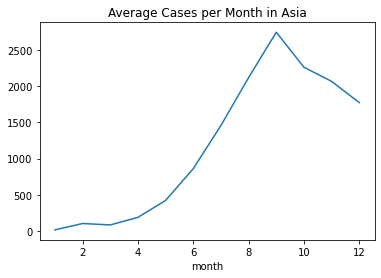

In [13]:
df = pandas.read_excel('s3://ia241-perkinlp/covid_data.xls')
asia_data = df.loc[df['continentExp'] == 'Asia']
plt.title('Average Cases per Month in Asia')
avg_cases_per_month_as = asia_data.groupby('month').mean()['cases']
avg_cases_per_month_as.plot()

<AxesSubplot:title={'center':'Average Cases per Month in Japan'}, xlabel='month'>

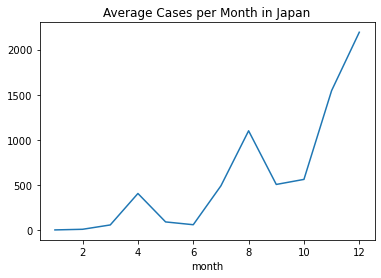

In [14]:
plt.title('Average Cases per Month in Japan')
avg_cases_per_month_jp = jp_data.groupby('month').mean()['cases']
avg_cases_per_month_jp.plot()

Japan followed a similar trend to the rest of Asia, though typically averaging fewer cases than their neighbors. For calculations, a mean was used to average the number of cases, and then group them by months.

# Conclusion

This website helps to both explain spikes in COVID deaths in Japan, in addition to helping assess Japan's response to the pandemic in comparison to their peers. In the first half of the website, a link can be drawn between the months with high cases, and the months with high deaths. Almost every month with a case spike in Japan was followed by a death spike (April-May, November-December). This can help health authorities anticipate spikes in death and hospitalization.

In the second half, Japan's efforts are compared. Japan's case to population ratio is revealed to be lower than the US's, indicating a more successful response to limiting the spread of COVID-19 than America. Similarly, in the last section, Japan's average cases per month are typically lower than the rest of Asia, demonstrating their relative success in reducing COVID spread in 2020. This can help to identify effective public health strategies.

Limitations:
There are some limitations to this data. Conclusions can only be used in the context of 2020, which is where this data is from. Due to new variants of COVID emerging every day, conclusions regarding the links with high case and death rates (following each other in monthly spikes) may not apply. Similarly, the Japanese data was only compared to the US and Asia, and therefore can only be discussed in comparison to those two regions/countries.

Improvements:
To mitigate some of the limitations, it would be helpful to include more recent data and compare it to more countries/regions. This would provide a more updated and relevant understanding of the Japanese response to COVID-19, and would allow us to draw more conclusions due to the newer data and comparisons. In addition, developing a vizualization for the case to population ratios would make the data easier to understand and share.